## Pacotes

In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

### Obtendo dados do BACEN

In [2]:
def bcb(codigo) :
    link = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'
    df = pd.read_json(link)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df

In [3]:
taxa_pf = 20716
taxa_selic = 432

In [4]:
taxa_juro_pf = bcb(taxa_pf)
taxa_selic_am = bcb(taxa_selic)

Text(0.5, 0, 'Data')

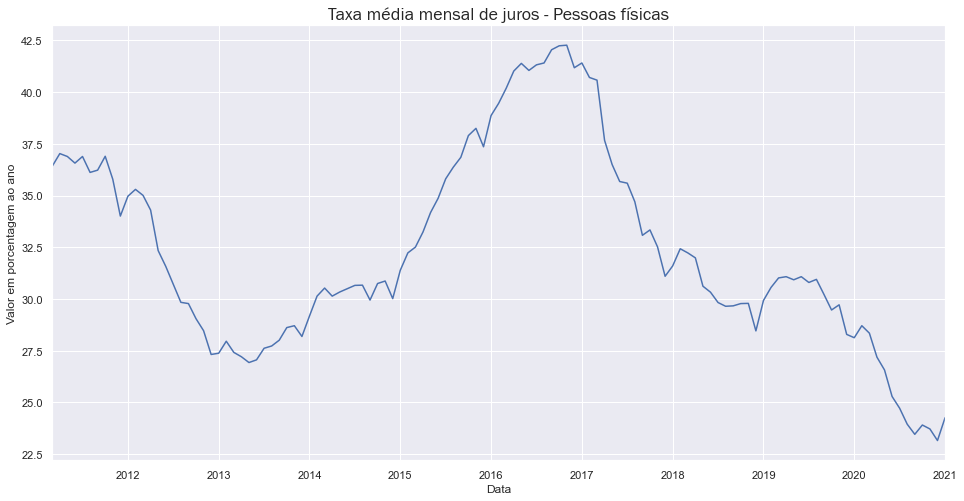

In [5]:
taxa_juro_pf.plot(legend = None)
plt.title('Taxa média mensal de juros - Pessoas físicas', fontsize = 18, fontname = 'Franklin Gothic Book')
plt.ylabel('Valor em porcentagem ao ano')
plt.xlabel('Data')

Text(0.5, 0, 'Data')

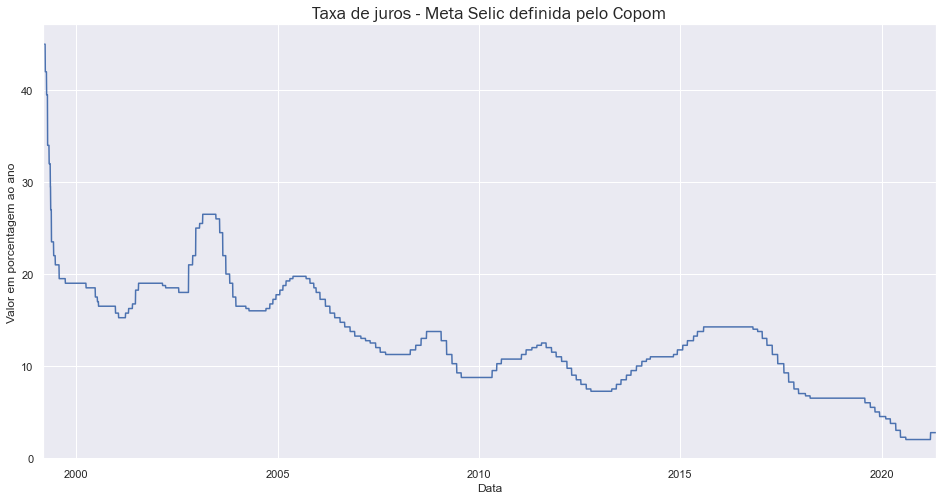

In [6]:
taxa_selic_am.plot(legend = None)
plt.title('Taxa de juros - Meta Selic definida pelo Copom', fontsize = 18, fontname = 'Franklin Gothic Book')
plt.ylabel('Valor em porcentagem ao ano')
plt.xlabel('Data')

In [12]:
taxa_selic_am['Taxa PF'] = taxa_juro_pf

##### Tratando dados pelo Excel, normalizando as datas

In [14]:
taxa_selic_am.to_excel(r'C:\Users\Pichau\Desktop\Python\juros.xlsx')

In [19]:
dados = pd.read_excel(r'C:\Users\Pichau\Desktop\Python\juros.xlsx', index_col = 0)

### Plotando dados

Text(0, 0.5, 'Taxa de juros ao ano')

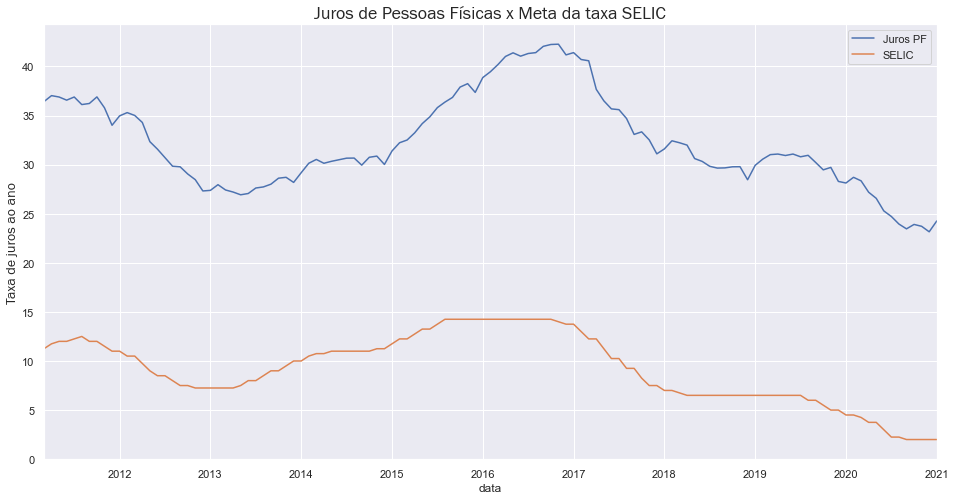

In [24]:
dados.plot()
plt.title('Juros de Pessoas Físicas x Meta da taxa SELIC', fontsize = 18, fontname = 'Franklin Gothic Book')
plt.ylabel('Taxa de juros ao ano', fontsize = 14, fontname = 'Franklin Gothic Book')